# Compare Results

In [1]:
import matplotlib.pyplot as plt
from myutils import read_csv_result
from data_managers import load_test_dataset, make_submission
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
test_dataset_dir = "../dataset/manual_regions_dataset_balanced/test_stage1"
result_1_url = "../results/ipv3_ave10.csv"
result_2_url = "../results/manual_region_balanced/ipv3_manual_region_balanced_t19.csv"

img_size = (299, 299)

In [3]:
result_1, img_names_1 = read_csv_result(result_1_url)
result_2, img_names_2 = read_csv_result(result_2_url)
img_test, img_names_test = load_test_dataset(img_size=img_size)

print len(result_1), len(result_2), len(img_names_test)

1000 1000 1000


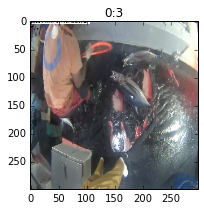

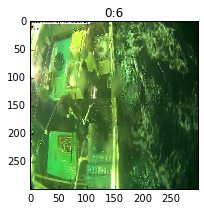

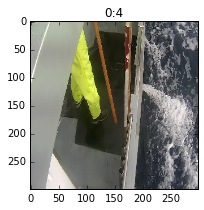

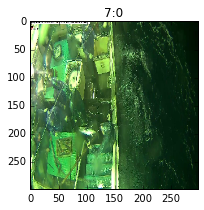

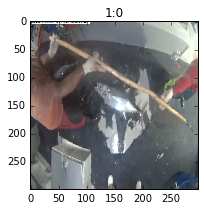

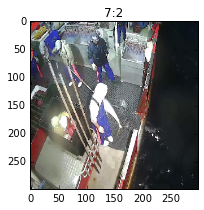

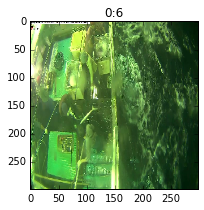

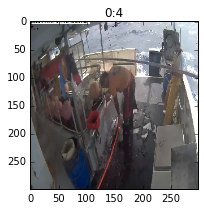

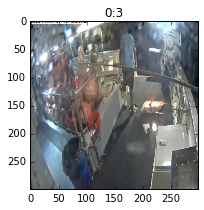

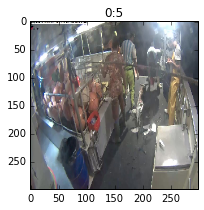

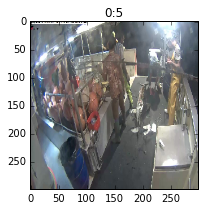

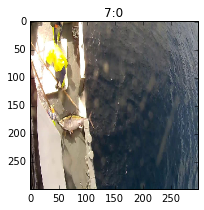

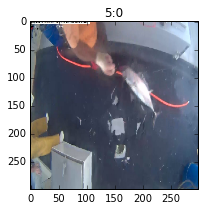

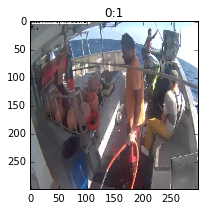

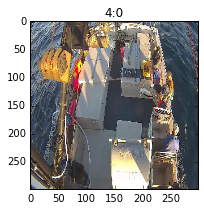

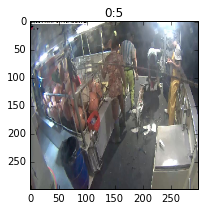

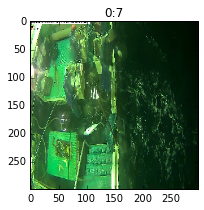

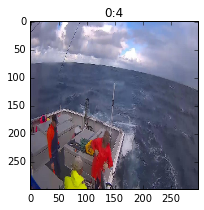

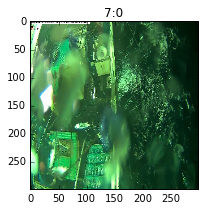

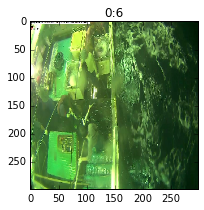

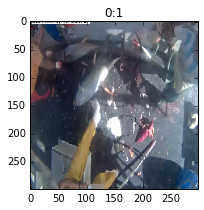

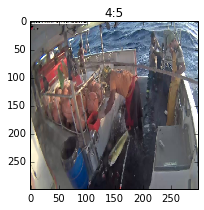

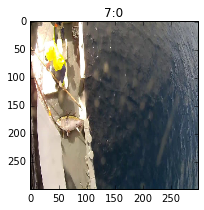

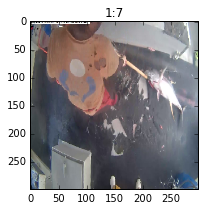

KeyboardInterrupt: 

In [4]:
for i in range(len(img_names_test)):
    img_name = img_names_test[i]
    scores_1 = result_1[img_names_1==img_name]
    scores_2 = result_2[img_names_2==img_name]
    idx_1 = np.argmax(scores_1)
    idx_2 = np.argmax(scores_2)
    if idx_1 != idx_2:
        plt.figure(figsize=(3, 3))
        plt.subplot(111)
        plt.title(str(idx_1) + ':' + str(idx_2))
        plt.imshow(np.rollaxis(img_test[i], 0, 3).astype('uint8'))
        plt.show()

## Merge Result

In [12]:
upper, lower = 1.0, 0.003

new_results, new_imgnames = [], []
for i in range(len(img_names_test)):
    img_name = img_names_test[i]
    scores_1 = result_1[img_names_1==img_name][0]
    scores_2 = result_2[img_names_2==img_name][0]
    idx_1 = np.argmax(scores_1)
    idx_2 = np.argmax(scores_2)
    
    new_score = (4*scores_2 + scores_1)/5.0
    new_score[new_score>=upper] = upper
    new_score[new_score<=lower] = lower
        
    new_results.append(new_score)
    new_imgnames.append(img_name)
    
new_results = np.array(new_results)
new_imgnames = np.array(new_imgnames)

In [13]:
filename = "../results/manual_region_merge_full_weighted(4_1)_(1.0_0.003).csv"
make_submission(filename, new_results, new_imgnames)

Submission file has been generated: ../results/manual_region_merge_full_weighted(4_1)_(1.0_0.003).csv


In [ ]:
print new_results.shape